In [1]:
cd /Users/eliasimos/Desktop/beaconcha.in\ data\ -\ fixed\ missing\ slots

/Users/eliasimos/Desktop/beaconcha.in data - fixed missing slots


In [2]:
ls

active_validators_over_time.csv
attestations/
attesterslashings.csv
beaconcha data.xlsx
block deposits.csv
block.csv
block_deposits.csv
blocks_n_vals_aggregate_data.zip
df_proposer_slashings_13k14k.csv
epoch_slot.csv
ffg_requirement_per_epoch_and_slot.csv
missed_per_epoch_sig.csv
missed_per_epoch_sum.csv
missing_slots.csv
orphaned_slot_indices.csv
prop_eff_by_client.csv
prop_eff_by_group.csv
prop_eff_by_group1.csv
prop_effectiveness_no_prop_outlier.csv
prop_slashing_ids_add_slasher.csv
proposer_data_pvt.csv
proposer_data_pvt1.csv
proposer_effectiveness.csv
proposer_effectiveness_master.csv
proposer_v_epoch.csv
proposerslashings.csv
val_balancehistory.csv
val_deposits.csv
val_ids.csv
val_per_epoch_master.csv
val_per_epoch_probs.csv
validator data/
validator.csv
validator_balance_history.csv
validator_performance.csv
validator_performance1.csv
validators.csv
validators1.csv
validators_by_identifier.csv
validators_by_indentifier_master.csv*
voluntaryexits.csv
xlsx/
zero_atts_yet_proposed_

In [3]:
# load useful packages
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
# add seaborn viz
sns.set()

In [4]:
# load and inspect df
df1 = pd.read_csv('block.csv')
df = df1.fillna(0)
# sort by slot
df = df.sort_values(by=['slot'])
# drop id column
del df['id']
df.head()
#df.loc[df['epoch'] == 13700]

,slot,status,as_of,epoch,eth1data_depositcount,attestationscount,attesterslashingscount,depositscount,proposerslashingscount,proposer,voluntaryexitscount,blockroot,eth1data_blockhash,eth1data_depositroot,graffiti,graffiti_text,parentroot,randaoreveal,signature,stateroot
51409,0,1,2020-08-04 13:00:08,0,0,0,0,20084,0,0,0,0xebe49843e96e538592c9e1976e155e9057c251ed9312...,0x00000000000000000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,0.0,0x00000000000000000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,0xaf6aafa94dcc22a5cf0253c4f5dd886397900034bf7c...
51410,1,1,2020-08-04 13:00:20,0,22637,10,0,0,0,9804,0,0x4f042e61cbf74a5064584f761951679c92844d8b314c...,0x560f09b440e530d7fee7ed01c5449fe318de36621234...,0x53d90f778f975dcca3f30e072b5c1a85cfd7a1b977b7...,0x2020ce9e204e4c5020ce9e2020000000000000000000...,0.0,0xebe49843e96e538592c9e1976e155e9057c251ed9312...,0xae31d21e3bdc77712576ddabae60f51e3592de21678e...,0x8e8ab1febbb4a6732b10fa7eadb2347b6c88ffdac557...,0x88caa8d6e2cd6b56d688e1cd5739c86559409a77557a...
51411,2,2,2020-08-04 13:00:32,0,0,0,0,0,0,8597,0,0x01,0,0,0,0.0,0,0,0,0
51412,3,1,2020-08-04 13:00:44,0,22637,26,0,0,0,4488,0,0x21dd54cc88833f37666ed4fa3649b31a7d55a2a18ddd...,0xe0c057333355956e8fb8d88382f5676bbe083fbf8b97...,0x53d90f778f975dcca3f30e072b5c1a85cfd7a1b977b7...,0x706f61706734654d372f637752692f5a68615a67307a...,0.0,0x4f042e61cbf74a5064584f761951679c92844d8b314c...,0xb3e4fbe3b3252fb56cb69903d71a3b7e923b55da4e9b...,0xabbd14e47ce75be671bfeb1158da75ffe8563cdad574...,0x817c1d7bf2f42faba7a38eee0045791b4ea11052bfbf...
51413,4,1,2020-08-04 13:00:56,0,22637,8,0,0,0,1072,0,0x35b622b5f42154f9294fd88e95cf5916391d530658ef...,0xe0c057333355956e8fb8d88382f5676bbe083fbf8b97...,0x53d90f778f975dcca3f30e072b5c1a85cfd7a1b977b7...,0x4c69676874686f7573652f76302e322e302f66323661...,0.0,0x21dd54cc88833f37666ed4fa3649b31a7d55a2a18ddd...,0x8505abaefc568507f1dfeebc6a496ba68da32a0ad40d...,0xb841963efa222b953e3d0db8ec73a5e4f48f76faebbf...,0x9859516a62d97be70647491ae1a7d856d1f31227d4c7...


# Some mods

In [5]:
# replace status tag with actual event description
df['status'] = df['status'].replace({1:'proposed', 2:'missed', 3:'orphaned'})

In [6]:
# generate slot v epoch df
epoch_slot = df[['slot', 'epoch']]
epoch_slot.to_csv('epoch_slot.csv')

# Slot pull check

In [7]:
#check df
df.tail(1)

,slot,status,as_of,epoch,eth1data_depositcount,attestationscount,attesterslashingscount,depositscount,proposerslashingscount,proposer,voluntaryexitscount,blockroot,eth1data_blockhash,eth1data_depositroot,graffiti,graffiti_text,parentroot,randaoreveal,signature,stateroot
458982,466335,missed,2020-10-08 07:27:08,14572,0,0,0,0,0,61052,0,0x01,0,0,0,0.0,0,0,0,0


In [8]:
df_roughtime = df[(df['epoch'] >= 2000) & (df['epoch'] <= 4000)]
df_roughtime['proposerslashingscount'].sum()

1

In [9]:
df_roughtime['attesterslashingscount'].sum()/df['attesterslashingscount'].sum()

0.9443579766536965

In [10]:
df_proposer_slashings = df[(df['proposerslashingscount'] > 0)]
df_proposer_slashings = df_proposer_slashings [(df_proposer_slashings['epoch'] > 13000)]
df_proposer_slashings.to_csv('df_proposer_slashings_13k14k.csv')

In [11]:
# count epochs - should amount to 14572
df['epoch'].nunique()

14570

In [12]:
# count slots - should amount to 466335
df['slot'].nunique()

466240

It seems that 2 epochs and 95 slots are missing?! FLAG IT IN THE REPORT - THIS IS DUE TO THE BEACONCHA.IN API

In [13]:
# single out slots
slots = df.filter(['slot'], axis=1)
slots = slots['slot'].to_list()

In [14]:
# program to Find missing integers in list 
def find_missing(lst): 
    start = lst[0] 
    end = lst[-1] 
    return sorted(set(range(start, end + 1)).difference(lst)) 
# driver code 
lst = slots 
# print(find_missing(lst))
missing_slots = pd.DataFrame(find_missing(lst), columns=['missing_slots'])
missing_slots

,missing_slots
0,457152
1,457153
2,457154
3,457155
4,457156
...,...
91,459707
92,459708
93,459709
94,459710


In [15]:
# export to csv
missing_slots.to_csv('missing_slots.csv')

In [16]:
# single out missing slots
missed_slot_indices = df.loc[df['status'] == 'missed']
missed_slot_indices = missed_slot_indices[['slot', 'status']]
missed_slot_indices.head(1)
#missed_slot_indices.to_csv('missed_slot_indices.csv')

,slot,status
51411,2,missed


In [17]:
# single out orphaned slots
orphaned_slot_indices = df.loc[df['status'] == 'orphaned']
orphaned_slot_indices = orphaned_slot_indices[['slot', 'status']]
orphaned_slot_indices.head(1)
#orphaned_slot_indices.to_csv('orphaned_slot_indices.csv')

,slot,status
51476,67,orphaned


In [18]:
# single out slots with no attestations, that weren't missed or orphaned
zero_atts_yet_proposed_slot_indices = df.loc[df['status'] == 'proposed']
zero_atts_yet_proposed_slot_indices = zero_atts_yet_proposed_slot_indices[['slot', 'status', 'attestationscount']]
zero_atts_yet_proposed_slot_indices = zero_atts_yet_proposed_slot_indices.loc[zero_atts_yet_proposed_slot_indices['attestationscount'] == 0]
zero_atts_yet_proposed_slot_indices.head(1)
#zero_atts_yet_proposed_slot_indices.to_csv('zero_atts_yet_proposed_slot_indices.csv')

,slot,status,attestationscount
51409,0,proposed,0


# Missed and Orphaned slots per epoch exploration

In [19]:
# filter for epochs, status and slots missed
epoch_status = df[["epoch", "status"]]
epoch_status['proposed'] = np.where(epoch_status['status'] == 'proposed', 1, 0)
epoch_status['missed'] = np.where(epoch_status['status'] == 'missed', 1, 0)
epoch_status['orphaned'] = np.where(epoch_status['status'] == 'orphaned', 1, 0)
epoch_status.head()

<ipython-input-19-bf87f2a6a727>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epoch_status['proposed'] = np.where(epoch_status['status'] == 'proposed', 1, 0)
<ipython-input-19-bf87f2a6a727>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epoch_status['missed'] = np.where(epoch_status['status'] == 'missed', 1, 0)
<ipython-input-19-bf87f2a6a727>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,epoch,status,proposed,missed,orphaned
51409,0,proposed,1,0,0
51410,0,proposed,1,0,0
51411,0,missed,0,1,0
51412,0,proposed,1,0,0
51413,0,proposed,1,0,0


In [20]:
# see head
epoch_status.head()

,epoch,status,proposed,missed,orphaned
51409,0,proposed,1,0,0
51410,0,proposed,1,0,0
51411,0,missed,0,1,0
51412,0,proposed,1,0,0
51413,0,proposed,1,0,0


In [21]:
epoch_slots_status = pd.pivot_table(epoch_status, index=["epoch"], values=["proposed", "missed", "orphaned"], aggfunc=sum)
epoch_slots_status.index.name = None
epoch_slots_status.sum()

missed      127172
orphaned      4800
proposed    334484
dtype: int64

In [22]:
# add columnd for % missed
epoch_slots_status['epoch'] = epoch_slots_status.index
epoch_slots_status['pct_proposed'] = epoch_slots_status['proposed']/32
epoch_slots_status['pct_missed'] = epoch_slots_status['missed']/32
epoch_slots_status['pct_orphaned'] = epoch_slots_status['orphaned']/32
epoch_slots_status.rename_axis(index="epoch")
epoch_slots_status.tail()

,missed,orphaned,proposed,epoch,pct_proposed,pct_missed,pct_orphaned
14568,8,0,24,14568,0.75000,0.25000,0.0
14569,5,0,27,14569,0.84375,0.15625,0.0
14570,6,0,26,14570,0.81250,0.18750,0.0
14571,9,0,23,14571,0.71875,0.28125,0.0
14572,9,0,23,14572,0.71875,0.28125,0.0


In [23]:
#export to csv
#pvt.to_csv('epoch_slots_status.csv')
epoch_slots_status.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14570 entries, 0 to 14572
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   missed        14570 non-null  int64  
 1   orphaned      14570 non-null  int64  
 2   proposed      14570 non-null  int64  
 3   epoch         14570 non-null  int64  
 4   pct_proposed  14570 non-null  float64
 5   pct_missed    14570 non-null  float64
 6   pct_orphaned  14570 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 910.6 KB


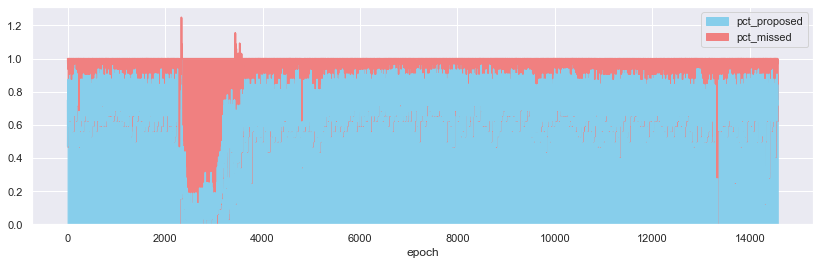

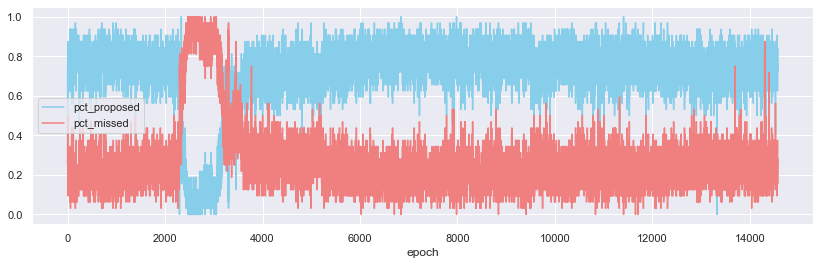

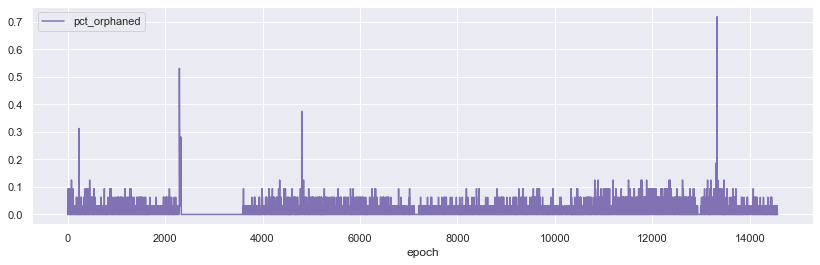

In [24]:
# time series of missed slots
epoch_slots_status.plot.area(x='epoch', y=['pct_proposed', 'pct_missed'] , figsize=(14,4), color = ['skyblue', 'lightcoral'])
epoch_slots_status.plot(kind='line', x='epoch', y=['pct_proposed', 'pct_missed'] , figsize=(14,4), color = ['skyblue', 'lightcoral'])
epoch_slots_status.plot(kind='line',x='epoch', y=['pct_orphaned'] , figsize=(14,4), color = ['m'])

In [25]:
#spin up correlation ratio
epoch_slots_status_corr = epoch_slots_status.drop(columns=['missed', 'proposed', 'orphaned']).corr()
# Draw the plot
epoch_slots_status_corr.style.background_gradient(cmap='coolwarm', axis=None)

,epoch,pct_proposed,pct_missed,pct_orphaned
epoch,1.000000,0.250748,-0.262218,0.084441
pct_proposed,0.250748,1.000000,-0.992239,-0.019171
pct_missed,-0.262218,-0.992239,1.000000,-0.100456
pct_orphaned,0.084441,-0.019171,-0.100456,1.000000


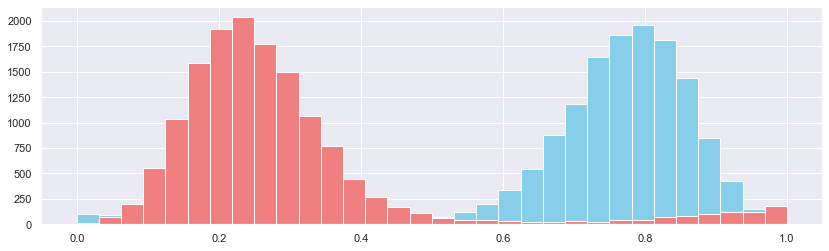

In [26]:
# distribution of proposed and missed slots
epoch_slots_status['pct_proposed'].hist(bins=32, figsize=(14,4), color = 'skyblue')
epoch_slots_status['pct_missed'].hist(bins=32, figsize=(14,4), color = 'lightcoral')

In [117]:
epoch_slots_status_normal = epoch_slots_status[(epoch_slots_status['epoch'] >= 4000)]
epoch_slots_status_abnormal = epoch_slots_status.loc[epoch_slots_status['pct_missed'] > 0.7]

In [119]:
epoch_slots_status_normal

,missed,orphaned,proposed,epoch,pct_proposed,pct_missed,pct_orphaned
count,10570.000000,10570.000000,10570.000000,10570.000000,10570.000000,10570.000000,10570.000000
mean,7.256481,0.355251,24.392242,9284.573321,0.762258,0.226765,0.011102
std,2.690024,0.690489,2.745829,3051.564373,0.085807,0.084063,0.021578
min,0.000000,0.000000,0.000000,4000.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,23.000000,6642.250000,0.718750,0.156250,0.000000
50%,7.000000,0.000000,25.000000,9284.500000,0.781250,0.218750,0.000000
75%,9.000000,1.000000,26.000000,11926.750000,0.812500,0.281250,0.031250
max,28.000000,23.000000,32.000000,14572.000000,1.000000,0.875000,0.718750


In [111]:
epoch_slots_status_normal.drop(['missed', 'orphaned', 'proposed', 'epoch'], axis=1).describe()

,pct_proposed,pct_missed,pct_orphaned
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [108]:
epoch_slots_status_abnormal.drop(['missed', 'orphaned', 'proposed', 'epoch'], axis=1).describe()

,pct_proposed,pct_missed,pct_orphaned
count,799.000000,799.000000,799.000000
mean,0.110138,0.889432,0.000978
std,0.076220,0.076487,0.013738
min,0.000000,0.718750,0.000000
25%,0.062500,0.843750,0.000000
50%,0.093750,0.906250,0.000000
75%,0.156250,0.937500,0.000000
max,0.312500,1.000000,0.281250


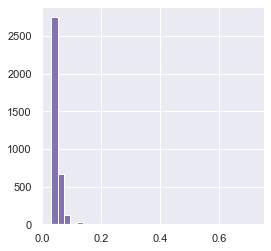

In [27]:
# distribution of orphaned slots
epoch_slots_status_orph = epoch_slots_status.loc[epoch_slots_status['pct_orphaned'] > 0]
epoch_slots_status_orph['pct_orphaned'].hist(bins=32, figsize=(4,4), color = "m")

It looks like a normal/Kochi distribution - we have tail events happen most likely for over 65% missed blocks

In [28]:
#filter data for missed blocks per epoch > 65%
missed_per_epoch_sig = epoch_slots_status[epoch_slots_status['pct_missed'] > 0.65]
missed_per_epoch_sig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855 entries, 2296 to 14394
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   missed        855 non-null    int64  
 1   orphaned      855 non-null    int64  
 2   proposed      855 non-null    int64  
 3   epoch         855 non-null    int64  
 4   pct_proposed  855 non-null    float64
 5   pct_missed    855 non-null    float64
 6   pct_orphaned  855 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 53.4 KB


In [29]:
# check if the epoch index is in place as it should be
missed_per_epoch_sig.tail()

,missed,orphaned,proposed,epoch,pct_proposed,pct_missed,pct_orphaned
14305,24,0,8,14305,0.25000,0.75000,0.0
14306,24,0,8,14306,0.25000,0.75000,0.0
14307,21,0,11,14307,0.34375,0.65625,0.0
14308,28,0,4,14308,0.12500,0.87500,0.0
14394,23,0,9,14394,0.28125,0.71875,0.0


# Proposer and attester slashings

In [150]:
# filter for epochs, status, slots,  missed
slashing_count = df[["epoch",'attesterslashingscount','proposerslashingscount']]
slashing_count = pd.pivot_table(slashing_count, index=["epoch"], values=["attesterslashingscount","proposerslashingscount"], aggfunc=sum)
slashing_count.index.name = None
slashing_count['epoch'] = slashing_count.index
slashing_count = pd.merge(left=slashing_count, right=epoch_slots_status, how='left', left_on='epoch', right_on='epoch')
slashing_count = slashing_count.drop(['missed', 'orphaned', 'proposed'], axis=1)
slashing_count

,attesterslashingscount,proposerslashingscount,epoch,pct_proposed,pct_missed,pct_orphaned
0,0,0,0,0.75000,0.25000,0.00000
1,0,0,1,0.65625,0.34375,0.00000
2,0,0,2,0.46875,0.50000,0.03125
3,0,0,3,0.62500,0.34375,0.03125
4,0,1,4,0.56250,0.43750,0.03125
...,...,...,...,...,...,...
14565,0,0,14568,0.75000,0.25000,0.00000
14566,0,0,14569,0.84375,0.15625,0.00000
14567,0,0,14570,0.81250,0.18750,0.00000
14568,0,0,14571,0.71875,0.28125,0.00000


In [31]:
# check correlations
slash_corr = slashing_count.corr()
slash_corr.style.background_gradient(cmap='coolwarm', axis=None)

,attesterslashingscount,proposerslashingscount,epoch,pct_proposed,pct_missed,pct_orphaned
attesterslashingscount,1.000000,-0.005686,-0.114441,-0.126758,0.132128,-0.049825
proposerslashingscount,-0.005686,1.000000,0.036156,0.008205,-0.010087,0.024975
epoch,-0.114441,0.036156,1.000000,0.250748,-0.262218,0.084441
pct_proposed,-0.126758,0.008205,0.250748,1.000000,-0.992239,-0.019171
pct_missed,0.132128,-0.010087,-0.262218,-0.992239,1.000000,-0.100456
pct_orphaned,-0.049825,0.024975,0.084441,-0.019171,-0.100456,1.000000


In [32]:
# check correlations for pct_mised > 65%
slashing_count_sig = slashing_count.loc[slashing_count['pct_missed'] > 0.65]
slashing_count_sig.corr().style.background_gradient(cmap='coolwarm', axis=None)

,attesterslashingscount,proposerslashingscount,epoch,pct_proposed,pct_missed,pct_orphaned
attesterslashingscount,1.000000,-0.009980,-0.081367,0.355874,-0.351189,-0.021111
proposerslashingscount,-0.009980,1.000000,0.004571,0.035799,-0.035217,-0.003266
epoch,-0.081367,0.004571,1.000000,0.214851,-0.205782,-0.046532
pct_proposed,0.355874,0.035799,0.214851,1.000000,-0.984033,0.021272
pct_missed,-0.351189,-0.035217,-0.205782,-0.984033,1.000000,-0.179536
pct_orphaned,-0.021111,-0.003266,-0.046532,0.021272,-0.179536,1.000000


Text(0, 0.5, 'slashing events count')

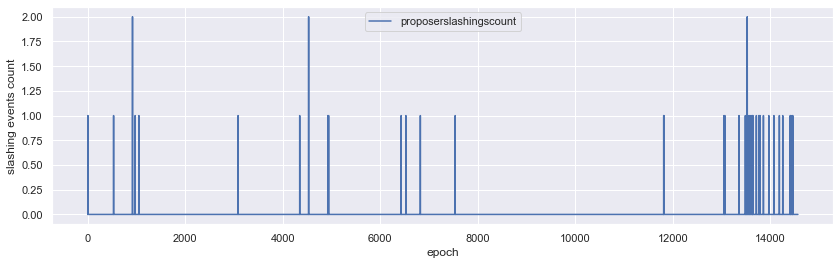

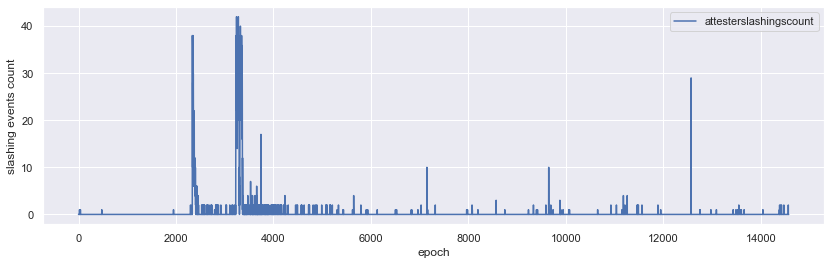

In [143]:
# plot slashings
slashing_count.plot(kind='line', y=['proposerslashingscount'], figsize=(14,4))
pl.xlabel("epoch")
pl.ylabel("slashing events count")
slashing_count.plot(kind='line', y=['attesterslashingscount'], figsize=(14,4))
pl.xlabel("epoch")
pl.ylabel("slashing events count")

In [159]:
slashing_count_att = slashing_count.loc[slashing_count['attesterslashingscount'] > 20]
slashing_count_att.head(60)

,attesterslashingscount,proposerslashingscount,epoch,pct_proposed,pct_missed,pct_orphaned
2335,38,0,2335,0.62500,0.37500,0.0
2336,22,0,2336,0.34375,0.65625,0.0
2337,36,0,2337,0.56250,0.43750,0.0
2339,28,0,2339,0.43750,0.56250,0.0
2343,28,0,2343,0.43750,0.56250,0.0
2344,22,0,2344,0.34375,0.65625,0.0
2348,24,0,2348,0.37500,0.62500,0.0
2349,38,0,2349,0.59375,0.40625,0.0
2351,28,0,2351,0.43750,0.56250,0.0
2352,22,0,2352,0.43750,0.56250,0.0


In [35]:
# slashing sums
prop_slashings = slashing_count['proposerslashingscount'].sum()
att_slashings = slashing_count['attesterslashingscount'].sum()

In [36]:
# proposer slashing sum
prop_slashings

46

In [37]:
# attester slashing sum
att_slashings

5140

# Proposer effectiveness

### STEP 1: A coarse view on proposer effectiveness - slots granted vs slots filled

In [38]:
# jog memory on block.csv content
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466456 entries, 51409 to 458982
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   slot                    466456 non-null  int64  
 1   status                  466456 non-null  object 
 2   as_of                   466456 non-null  object 
 3   epoch                   466456 non-null  int64  
 4   eth1data_depositcount   466456 non-null  int64  
 5   attestationscount       466456 non-null  int64  
 6   attesterslashingscount  466456 non-null  int64  
 7   depositscount           466456 non-null  int64  
 8   proposerslashingscount  466456 non-null  int64  
 9   proposer                466456 non-null  int64  
 10  voluntaryexitscount     466456 non-null  int64  
 11  blockroot               466456 non-null  object 
 12  eth1data_blockhash      466456 non-null  object 
 13  eth1data_depositroot    466456 non-null  object 
 14  graffiti        

In [39]:
# select proposer view and add column for participation
proposer_data = df[['epoch', 'slot', 'proposer', 'status']]
proposer_data['missed'] = np.where(epoch_status['status'] == 'missed', 1, 0)
proposer_data['participated'] = 1
#filter for orphaned
proposer_data = proposer_data.loc[proposer_data['status'] != 'orphaned']
proposer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461656 entries, 51409 to 458982
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   epoch         461656 non-null  int64 
 1   slot          461656 non-null  int64 
 2   proposer      461656 non-null  int64 
 3   status        461656 non-null  object
 4   missed        461656 non-null  int64 
 5   participated  461656 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 24.7+ MB


<ipython-input-39-de0e18d50d82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proposer_data['missed'] = np.where(epoch_status['status'] == 'missed', 1, 0)
<ipython-input-39-de0e18d50d82>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proposer_data['participated'] = 1


In [40]:
# pivot on proposer effectiveness
proposer_data_pvt = pd.pivot_table(proposer_data, index=["proposer"], values=["missed","participated"], aggfunc=sum)
proposer_data_pvt['proposer_effectiveness'] = (proposer_data_pvt['participated']-proposer_data_pvt['missed'])/proposer_data_pvt['participated']
proposer_data_pvt.index.name = None
proposer_data_pvt.sort_values(by=['participated'], ascending=False)
proposer_data_pvt['validator_index'] = proposer_data_pvt.index
proposer_data_pvt

,missed,participated,proposer_effectiveness,validator_index
0,7,17,0.588235,0
1,5,5,0.000000,1
2,8,8,0.000000,2
3,4,16,0.750000,3
4,0,6,1.000000,4
...,...,...,...,...
76632,1,1,0.000000,76632
76646,0,1,1.000000,76646
76668,0,1,1.000000,76668
76773,0,1,1.000000,76773


This is a good first step. Now we need to create some sort of weight for time active

### STEP 2: Validator activation epoch

In [41]:
ls

active_validators_over_time.csv
attestations/
attesterslashings.csv
beaconcha data.xlsx
block deposits.csv
block.csv
block_deposits.csv
blocks_n_vals_aggregate_data.zip
df_proposer_slashings_13k14k.csv
epoch_slot.csv
ffg_requirement_per_epoch_and_slot.csv
missed_per_epoch_sig.csv
missed_per_epoch_sum.csv
missing_slots.csv
orphaned_slot_indices.csv
prop_eff_by_client.csv
prop_eff_by_group.csv
prop_eff_by_group1.csv
prop_effectiveness_no_prop_outlier.csv
prop_slashing_ids_add_slasher.csv
proposer_data_pvt.csv
proposer_data_pvt1.csv
proposer_effectiveness.csv
proposer_effectiveness_master.csv
proposer_v_epoch.csv
proposerslashings.csv
val_balancehistory.csv
val_deposits.csv
val_ids.csv
val_per_epoch_master.csv
val_per_epoch_probs.csv
validator data/
validator.csv
validator_balance_history.csv
validator_performance.csv
validator_performance1.csv
validators.csv
validators1.csv
validators_by_identifier.csv
validators_by_indentifier_master.csv*
voluntaryexits.csv
xlsx/
zero_atts_yet_proposed_

In [42]:
# load validator csv
val = pd.read_csv('validators1.csv')
val['slashed'].fillna(0)
val.tail()

,id,validatorindex,name,activationeligibilityepoch,activationepoch,exitepoch,withdrawableepoch,balance,effectivebalance,lastattestationslot,pubkey,slashed,withdrawalcredentials
78842,78843,78842,NaN,14876,15040,9223372036854775807,9223372036854775807,32000000000,32000000000,0,0x989f6bb8b942587ca2a2e1bb8dec28f5aa13c0269b18...,NaN,0x00d77be6277f1cdcfce33fdcb127b95fe91e09eec04a...
78843,78844,78843,NaN,14876,15040,9223372036854775807,9223372036854775807,32000000000,32000000000,0,0x94efb6400786809437baffe61c28d186b56a37926c6f...,NaN,0x00d77be6277f1cdcfce33fdcb127b95fe91e09eec04a...
78844,78845,78844,NaN,14876,15040,9223372036854775807,9223372036854775807,32000000000,32000000000,0,0xb515eb9e2348e711cbf834013b1dddfa88118460e71e...,NaN,0x00d77be6277f1cdcfce33fdcb127b95fe91e09eec04a...
78845,78846,78845,NaN,14876,15040,9223372036854775807,9223372036854775807,32000000000,32000000000,0,0x9320960892c5cd3853f97009c93929fd6f777657c684...,NaN,0x00d77be6277f1cdcfce33fdcb127b95fe91e09eec04a...
78846,78847,78846,NaN,14906,15041,9223372036854775807,9223372036854775807,32000000000,32000000000,0,0xa7506b532f3f62487774cbfb3288abed4c3101252e1e...,NaN,0x00d77be6277f1cdcfce33fdcb127b95fe91e09eec04a...


In [43]:
# select validator index and activation epoch
val_activation = val[['validatorindex', 'activationepoch', 'slashed']]
val_activation

,validatorindex,activationepoch,slashed
0,0,0,NaN
1,1,0,NaN
2,2,0,NaN
3,3,0,NaN
4,4,0,NaN
...,...,...,...
78842,78842,15040,NaN
78843,78843,15040,NaN
78844,78844,15040,NaN
78845,78845,15040,NaN


In [44]:
# insert parameter and then column for 'epochs active'
latest_epoch = 14572
val_activation['epochs_active'] = latest_epoch-val_activation['activationepoch']
val_activation

<ipython-input-44-9494f84d0f22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_activation['epochs_active'] = latest_epoch-val_activation['activationepoch']


,validatorindex,activationepoch,slashed,epochs_active
0,0,0,NaN,14572
1,1,0,NaN,14572
2,2,0,NaN,14572
3,3,0,NaN,14572
4,4,0,NaN,14572
...,...,...,...,...
78842,78842,15040,NaN,-468
78843,78843,15040,NaN,-468
78844,78844,15040,NaN,-468
78845,78845,15040,NaN,-468


In [45]:
# filter for epochs_active > 0
val_activation = val_activation.loc[val_activation['epochs_active'] > 0]
val_activation

,validatorindex,activationepoch,slashed,epochs_active
0,0,0,NaN,14572
1,1,0,NaN,14572
2,2,0,NaN,14572
3,3,0,NaN,14572
4,4,0,NaN,14572
...,...,...,...,...
76962,76962,14570,NaN,2
76963,76963,14571,NaN,1
76964,76964,14571,NaN,1
76965,76965,14571,NaN,1


The two views we are trying to compare are mismatched such that:
- val_activation.validatorindex.max = 76966
- proposer_data_pvt_mod.validator_index.max = 76787

In the next step, we work a fix so the two indices end at the same number

In [46]:
# filter val_activation for index < 76787
val_activation = val_activation.loc[val_activation['validatorindex'] < 76789]
# check outcome
val_activation

,validatorindex,activationepoch,slashed,epochs_active
0,0,0,NaN,14572
1,1,0,NaN,14572
2,2,0,NaN,14572
3,3,0,NaN,14572
4,4,0,NaN,14572
...,...,...,...,...
76784,76784,14526,NaN,46
76785,76785,14526,NaN,46
76786,76786,14526,NaN,46
76787,76787,14527,NaN,45


### STEP 3: MERGE coarse effectiveness and time active

In [47]:
# check the proposer_data_pvt_mod df and filter for same number of validator_index with the activation df
proposer_data_pvt = proposer_data_pvt.loc[proposer_data_pvt['validator_index'] < 76787]
proposer_data_pvt

,missed,participated,proposer_effectiveness,validator_index
0,7,17,0.588235,0
1,5,5,0.000000,1
2,8,8,0.000000,2
3,4,16,0.750000,3
4,0,6,1.000000,4
...,...,...,...,...
76625,0,1,1.000000,76625
76632,1,1,0.000000,76632
76646,0,1,1.000000,76646
76668,0,1,1.000000,76668


It looks like there is still a mismatch between the datasets; 
- proposer_data_pvt_mod rows: 69418
- val_activation: 76782

So there are 7364 validators that have never proposed a block!

Now we have to find a way to merge the two dataframes only on the values that match on the more populated dataframe (val_activation), and leave the rows that mismatch empty or fillna

In [48]:
#rename column val_activation so it matches the other df
val_activation = val_activation.rename(columns={'validatorindex':'validator_index'})
val_activation

,validator_index,activationepoch,slashed,epochs_active
0,0,0,NaN,14572
1,1,0,NaN,14572
2,2,0,NaN,14572
3,3,0,NaN,14572
4,4,0,NaN,14572
...,...,...,...,...
76784,76784,14526,NaN,46
76785,76785,14526,NaN,46
76786,76786,14526,NaN,46
76787,76787,14527,NaN,45


In [49]:
# left join the two dataframes
proposer_effectiveness = pd.merge(left=val_activation, right=proposer_data_pvt, how='left', left_on='validator_index', right_on='validator_index')
proposer_effectiveness['proposer_effectiveness_time_weighted'] = proposer_effectiveness['proposer_effectiveness']/proposer_effectiveness['epochs_active']
proposer_effectiveness_alpha = proposer_effectiveness.fillna(0)
proposer_effectiveness_alpha.sort_values(by=['validator_index'])

,validator_index,activationepoch,slashed,epochs_active,missed,participated,proposer_effectiveness,proposer_effectiveness_time_weighted
0,0,0,0.0,14572,7.0,17.0,0.588235,0.000040
1,1,0,0.0,14572,5.0,5.0,0.000000,0.000000
2,2,0,0.0,14572,8.0,8.0,0.000000,0.000000
3,3,0,0.0,14572,4.0,16.0,0.750000,0.000051
4,4,0,0.0,14572,0.0,6.0,1.000000,0.000069
...,...,...,...,...,...,...,...,...
76779,76784,14526,0.0,46,0.0,0.0,0.000000,0.000000
76780,76785,14526,0.0,46,0.0,0.0,0.000000,0.000000
76781,76786,14526,0.0,46,0.0,0.0,0.000000,0.000000
76782,76787,14527,0.0,45,0.0,0.0,0.000000,0.000000


### STEP 4: Probability of proposing at least once

Another CRUCIAL bit of information that needs to be incorporated here, and that's not only how many epochs they have been around for, but also what sort of competition they are facing - i.e. what the chances are that they would be selected. 

If they joined later, they also face more competition - so their score should be also mediated by that. Regardless, probably useful to bake timing of proposer slots in, with a little more granularity. 

The probability that a validator got at least one proposer slot after they joined, is the inverse of the probability that they got no slots since they joined - such that:

`P(propose_at_least_once) = 1 - P(not_proposing)^n`

This is a little bit out of my depth to compute here - so moving to excel. Results below:

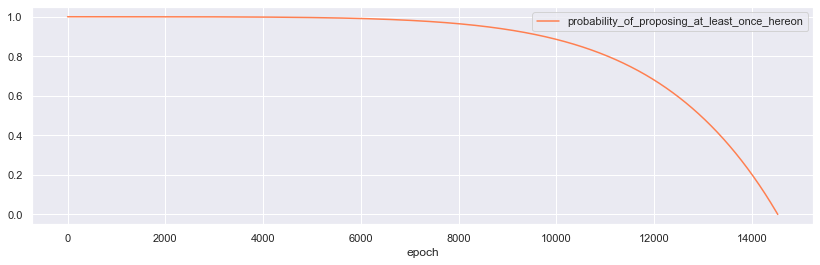

In [50]:
#load csv
val_per_epoch_probs = pd.read_csv('val_per_epoch_probs.csv')
#filter for columns of interest
val_per_epoch_probs = val_per_epoch_probs[['epoch', 'probability_of_proposing_at_least_once_hereon']]
#plot
val_per_epoch_probs.plot(kind='line',x='epoch', y='probability_of_proposing_at_least_once_hereon', color="coral", figsize=(14,4))

Looks correct! Now let's merge it into the proposer_effectiveness df

In [51]:
#merge dataframes
proposer_effectiveness = pd.merge(left=proposer_effectiveness_alpha, right=val_per_epoch_probs, how='left', left_on='activationepoch', right_on='epoch')
proposer_effectiveness['proposer_effectiveness_time_n_diff_weighted'] = proposer_effectiveness['proposer_effectiveness_time_weighted']/proposer_effectiveness['probability_of_proposing_at_least_once_hereon']
proposer_effectiveness.sort_values(by=['proposer_effectiveness_time_weighted'], ascending=False, inplace=True)
proposer_effectiveness

,validator_index,activationepoch,slashed,epochs_active,missed,participated,proposer_effectiveness,proposer_effectiveness_time_weighted,epoch,probability_of_proposing_at_least_once_hereon,proposer_effectiveness_time_n_diff_weighted
76768,76773,14523,0.0,49,0.0,1.0,1.0,0.020408,14523.0,0.001688,12.087853
76663,76668,14497,0.0,75,0.0,1.0,1.0,0.013333,14497.0,0.012602,1.058056
76641,76646,14491,0.0,81,0.0,1.0,1.0,0.012346,14491.0,0.015105,0.817306
76620,76625,14486,0.0,86,0.0,1.0,1.0,0.011628,14486.0,0.017187,0.676536
76598,76603,14481,0.0,91,0.0,1.0,1.0,0.010989,14481.0,0.019266,0.570393
...,...,...,...,...,...,...,...,...,...,...,...
22865,22865,733,0.0,13839,11.0,11.0,0.0,0.000000,733.0,0.999955,0.000000
22864,22864,733,0.0,13839,8.0,8.0,0.0,0.000000,733.0,0.999955,0.000000
22863,22863,732,0.0,13840,12.0,12.0,0.0,0.000000,732.0,0.999955,0.000000
22862,22862,732,0.0,13840,15.0,15.0,0.0,0.000000,732.0,0.999955,0.000000


In [52]:
# print to csv
proposer_effectiveness.to_csv('proposer_effectiveness.csv')

# Proposer effectiveness - analysis

We finally have the table we need to score proposing validators for their proposer effectiveness! Now, here's the catch: these validators should be scored in 2 (or even 3 segments):
- (1) those who haven't caught any breaks because they're still young
- (2) those who haven't caught any breaks but have been around for long enough
- (3) those who have been around enough and caught breaks

From the above, (3) is the only group where the planned "proposer_effectiveness" metric can actually apply. (1) should not be (at all) included in the scoring and (2) ... well we probably need to do more research on protocol rules re: (2)

Let's explore the dataset a bit in order to be able to get to some criteria.

Text(0, 0.5, 'validators with no proposer slots')

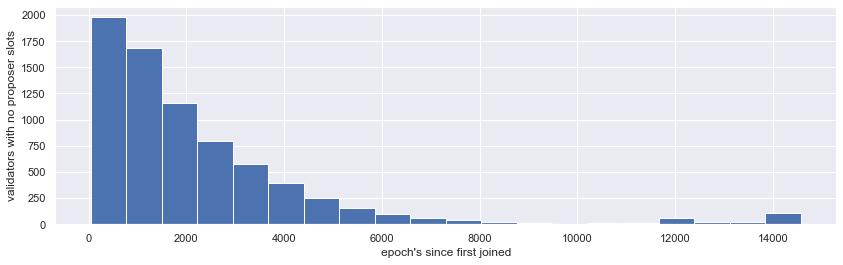

In [53]:
# select those validators that have 0 participations
no_prop = proposer_effectiveness.loc[proposer_effectiveness['participated'] == 0]
no_prop['epochs_active'].hist(bins=20, figsize=(14,4))
pl.xlabel("epoch's since first joined")
pl.ylabel("validators with no proposer slots")

The distribution looks ok - expected that for shorter participation, it's more likely that no proposer slotds will have been achieved.

However, there are some interesting observations at the end of the distribution. Particularly validators that have been active for over 11,500 epochs and have YET to achieve a proposer slot.

Let's single them out.

In [54]:
no_prop_outlier = no_prop.loc[no_prop['epochs_active'] > 11700]
no_prop_outlier.info()
no_prop_outlier['slashed'].sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 2550 to 23314
Data columns (total 11 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   validator_index                                203 non-null    int64  
 1   activationepoch                                203 non-null    int64  
 2   slashed                                        203 non-null    float64
 3   epochs_active                                  203 non-null    int64  
 4   missed                                         203 non-null    float64
 5   participated                                   203 non-null    float64
 6   proposer_effectiveness                         203 non-null    float64
 7   proposer_effectiveness_time_weighted           203 non-null    float64
 8   epoch                                          203 non-null    float64
 9   probability_of_proposing_at_least_once_hereon  20

183.0

Looks like the majority of those got slashed - but was it slashed and out? what happened to their effective balances? Maybe interesting to investigate a little more.

In [55]:
no_prop_outlier.to_csv('prop_effectiveness_no_prop_outlier.csv')

Now, moving on to those that have achieved 1 or more proposer slots

Text(0, 0.5, 'pct of all validators')

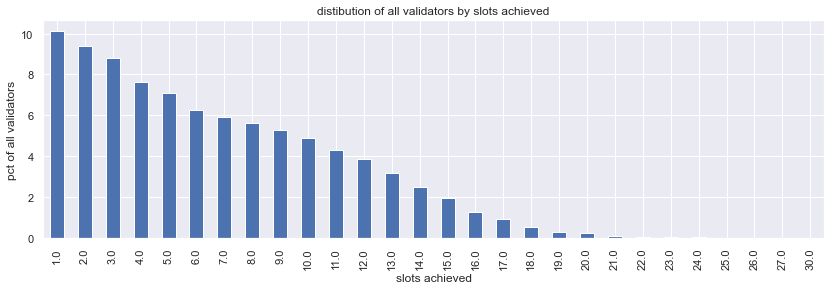

In [56]:
# filter for those with one or more proposer slots
one_plus_prop = proposer_effectiveness.loc[proposer_effectiveness['participated'] > 0]
#one_plus_prop.info()
one_plus_prop_a = pd.pivot_table(one_plus_prop, index=["participated"], values=["missed"], aggfunc="count")
one_plus_prop_a.index.name = None
one_plus_prop_a['% of validators that have achieved more than 1 slot'] = one_plus_prop_a['missed']*100/76786
one_plus_prop_a['% of validators that have achieved more than 1 slot'].plot(kind='bar', figsize=(14,4))
pl.title("distibution of all validators by slots achieved")
pl.xlabel("slots achieved")
pl.ylabel("pct of all validators")

Text(0, 0.5, 'slots missed on average')

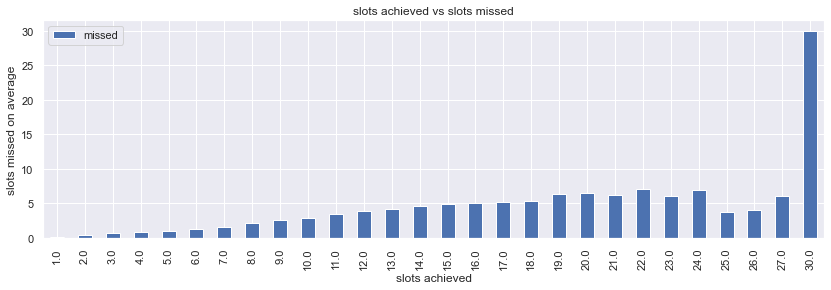

In [57]:
one_plus_prop_b = pd.pivot_table(one_plus_prop, index=["participated"], values=["missed"], aggfunc="mean")
one_plus_prop_b.index.name = None
one_plus_prop_b.plot(kind='bar', figsize=(14,4))
pl.title("slots achieved vs slots missed")
pl.xlabel("slots achieved")
pl.ylabel("slots missed on average")

- Observation 1: 1 validator (15110) who has been active since epoch 0 has achieved 27 slots and missed all 27. This is worth investigating
- Observation 2: the validators that have achieved more than 22 slots are an interesting group  - their slots_missed/slots_achieved ration (effectiveness) seems to be a lot better than others.

Let's take a closer look

In [58]:
one_plus_prop_over_22 = proposer_effectiveness.loc[proposer_effectiveness['participated'] > 22]
one_plus_prop_over_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 23628 to 15110
Data columns (total 11 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   validator_index                                39 non-null     int64  
 1   activationepoch                                39 non-null     int64  
 2   slashed                                        39 non-null     float64
 3   epochs_active                                  39 non-null     int64  
 4   missed                                         39 non-null     float64
 5   participated                                   39 non-null     float64
 6   proposer_effectiveness                         39 non-null     float64
 7   proposer_effectiveness_time_weighted           39 non-null     float64
 8   epoch                                          39 non-null     float64
 9   probability_of_proposing_at_least_once_hereon  39

Only 35 slots there that have been active since the earlier stages of the testnet - not clear if significant.

# Probability of being selected as a proposer per epoch

In [59]:
# now find how many validators have been active in each epoch
val_per_epoch_simple = pd.pivot_table(proposer_effectiveness, index=["activationepoch"], values=["validator_index"], aggfunc='count')
val_per_epoch_simple.index.name = None
val_per_epoch_simple = val_per_epoch_simple.cumsum()
val_per_epoch_simple['epoch'] = val_per_epoch_simple.index
val_per_epoch_simple

,validator_index,epoch
0,20084,0
38,20088,38
39,20092,39
40,20096,40
41,20100,41
...,...,...
14523,76770,14523
14524,76774,14524
14525,76778,14525
14526,76782,14526


In [60]:
# calculate the voluntary exits per epoch over time
voluntary_exits_cum = pd.pivot_table(df, index=["epoch"], values=["voluntaryexitscount"], aggfunc=sum)
voluntary_exits_cum.index.name = None
voluntary_exits_cum = voluntary_exits_cum.cumsum()
voluntary_exits_cum['epoch'] = voluntary_exits_cum.index
voluntary_exits_cum.tail()

,voluntaryexitscount,epoch
14568,1009,14568
14569,1009,14569
14570,1009,14570
14571,1009,14571
14572,1009,14572


In [61]:
# left join the two sets
val_per_epoch_master = pd.merge(left=val_per_epoch_simple, right=voluntary_exits_cum, how='left', left_on = 'epoch', right_on = 'epoch')
val_per_epoch_master['active_validators_per_epoch'] = val_per_epoch_master['validator_index'] - val_per_epoch_master['voluntaryexitscount']
val_per_epoch_master = val_per_epoch_master[['epoch', 'active_validators_per_epoch']]
val_per_epoch_master
#calculate the probability of proposing a block (32 proposers per epoch)
val_per_epoch_master['prob_of_proposing'] = (32/val_per_epoch_master['active_validators_per_epoch'])
val_per_epoch_master

,epoch,active_validators_per_epoch,prob_of_proposing
0,0,20084.0,0.001593
1,38,20088.0,0.001593
2,39,20092.0,0.001593
3,40,20096.0,0.001592
4,41,20100.0,0.001592
...,...,...,...
14172,14523,75761.0,0.000422
14173,14524,75765.0,0.000422
14174,14525,75769.0,0.000422
14175,14526,75773.0,0.000422


In [62]:
#generate a column from 0 to 14526
dfe = pd.DataFrame({ 'epoch' : range(0, 14527)})
#merge and frontfill
val_per_epoch_master = pd.merge(left=dfe, right=val_per_epoch_master, how='left', left_on = 'epoch', right_on = 'epoch')
val_per_epoch_master = val_per_epoch_master.ffill()
val_per_epoch_master
#export to csv
val_per_epoch_master.to_csv('val_per_epoch_master.csv')

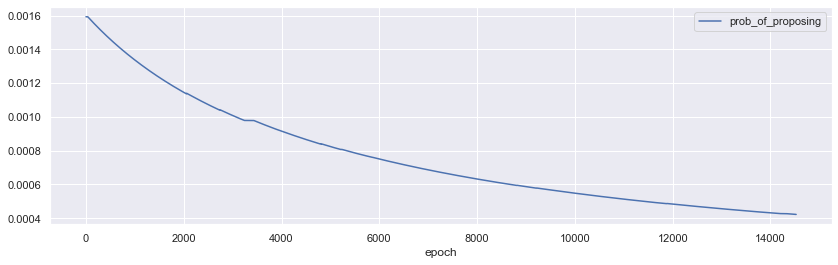

In [63]:
val_per_epoch_master.plot(kind='line',x='epoch', y='prob_of_proposing', figsize=(14,4))

## Validator balances - look after attestations

In [64]:
# merge the two dataframes - val_per_epoch_master AND proposer_effectiveness
#proposer_effectiveness_2 = pd.merge(left=proposer_effectiveness, right=val_per_epoch_master, how='left', left_on = 'activationepoch', right_on = 'epoch')
#proposer_effectiveness_2

In [65]:
# load validator_balance csv - you can use this to measure for effectiveness too
val_perf = pd.read_csv('validator_performance1.csv')
# fix balances
val_perf['balance'] = val_perf['balance']/1e9
val_perf['performance1d'] = val_perf['performance1d']/1e9
val_perf['performance31d'] = val_perf['performance31d']/1e9
val_perf['performance365d'] = val_perf['performance365d']/1e9
val_perf['performance7d'] = val_perf['performance7d']/1e9
# skim for the remainder to fit the df above
val_perf = val_perf.loc[val_perf['validatorindex'] < 76789]
val_perf.tail()

,id,validatorindex,balance,performance1d,performance31d,performance365d,performance7d
76762,76764,76784,32.003484,-0.002969,0.003484,0.003484,0.003484
76763,76765,76785,32.003458,-0.002899,0.003458,0.003458,0.003458
76764,76766,76786,32.003416,-0.003050,0.003416,0.003416,0.003416
76765,76767,76787,32.005647,-0.002968,0.005647,0.005647,0.005647
76766,76768,76788,32.013760,0.006788,0.013760,0.013760,0.013760


looks like it worked - let's put it in a csv!

In [66]:
# select those validators that have 0 participations
no_prop = proposer_effectiveness_master.loc[proposer_effectiveness_master['participated'] == 0]
no_prop

NameError: name 'proposer_effectiveness_master' is not defined

# Validator stats (from validator.csv)

In [ ]:
ls

In [67]:
validators = pd.read_csv('validators1.csv')
validators.head()

,id,validatorindex,name,activationeligibilityepoch,activationepoch,exitepoch,withdrawableepoch,balance,effectivebalance,lastattestationslot,pubkey,slashed,withdrawalcredentials
0,1,0,NaN,0,0,9223372036854775807,9223372036854775807,31751489943,31000000000,476737,0x8fcf28896a85e5e76ee9e508438e23e7253da1a23a65...,NaN,0x0010361af430aa7ab4a9567eaaca50ec5e02315ca151...
1,2,1,NaN,0,0,9223372036854775807,9223372036854775807,94015709868,32000000000,0,0x873e73ee8b3e4fcf1d2fb0f1036ba996ac9910b5b348...,NaN,0x00b8cdcf79ba7e74300a07e9d8f8121dd0d8dd11dcfd...
2,3,2,NaN,0,0,9223372036854775807,9223372036854775807,30091773156,30000000000,0,0x8c2f535d3bec65f95cb4ba455566e4ec3de8da5c13a6...,NaN,0x006490500934b8b1876401dc09b7904d04c0897a9a28...
3,4,3,carlbeek | Lighthouse ??,0,0,9223372036854775807,9223372036854775807,31445974991,31000000000,476758,0xa8d9b5b62cc31149ad58a281a2293cd3f4dca11855c9...,NaN,0x002f5bc32089b840a516c800c3c597bff24536c6c7c9...
4,5,4,NaN,0,0,5223,5479,31403584679,31000000000,0,0xadf943279435f1c194add1cdfe99e3fde5284d0451a6...,NaN,0x0010361af430aa7ab4a9567eaaca50ec5e02315ca151...


In [68]:
# single out slots
validator_index = validators.filter(['validatorindex'], axis=1)
validator_index.tail(1)

,validatorindex
78846,78846


All good! Now shape up the df a bit

In [69]:
#change balance to actual value
validators['balance'] = validators['balance']/1000000000
validators['effectivebalance'] = validators['effectivebalance']/1000000000
# replace 9223372036854775807 tag with 14572 - the last epoch in the dataset
validators['exitepoch'] = validators['exitepoch'].replace({9223372036854775807:14572})
validators['withdrawableepoch'] = validators['withdrawableepoch'].replace({9223372036854775807:14572})
# fill nan with 0
validators.fillna(0)
# inspect
validators.head()

,id,validatorindex,name,activationeligibilityepoch,activationepoch,exitepoch,withdrawableepoch,balance,effectivebalance,lastattestationslot,pubkey,slashed,withdrawalcredentials
0,1,0,NaN,0,0,14572,14572,31.751490,31.0,476737,0x8fcf28896a85e5e76ee9e508438e23e7253da1a23a65...,NaN,0x0010361af430aa7ab4a9567eaaca50ec5e02315ca151...
1,2,1,NaN,0,0,14572,14572,94.015710,32.0,0,0x873e73ee8b3e4fcf1d2fb0f1036ba996ac9910b5b348...,NaN,0x00b8cdcf79ba7e74300a07e9d8f8121dd0d8dd11dcfd...
2,3,2,NaN,0,0,14572,14572,30.091773,30.0,0,0x8c2f535d3bec65f95cb4ba455566e4ec3de8da5c13a6...,NaN,0x006490500934b8b1876401dc09b7904d04c0897a9a28...
3,4,3,carlbeek | Lighthouse ??,0,0,14572,14572,31.445975,31.0,476758,0xa8d9b5b62cc31149ad58a281a2293cd3f4dca11855c9...,NaN,0x002f5bc32089b840a516c800c3c597bff24536c6c7c9...
4,5,4,NaN,0,0,5223,5479,31.403585,31.0,0,0xadf943279435f1c194add1cdfe99e3fde5284d0451a6...,NaN,0x0010361af430aa7ab4a9567eaaca50ec5e02315ca151...


Maybe worth checking how many validators enterred the testnet and how this trended over time

In [70]:
#pivot validators_entry
validators_entry = pd.pivot_table(validators, index=["activationepoch"], values=["validatorindex","exitepoch"], aggfunc='count')
validators_entry.index.name = None
#cumsum
validators_entry['validatorindex_cumul'] = validators_entry['validatorindex'].cumsum()
#create new column with index
validators_entry['epoch'] = validators_entry.index
validators_entry

,exitepoch,validatorindex,validatorindex_cumul,epoch
0,20084,20084,20084,0
38,4,4,20088,38
39,4,4,20092,39
40,4,4,20096,40
41,4,4,20100,41
...,...,...,...,...
15038,4,4,78832,15038
15039,4,4,78836,15039
15040,4,4,78840,15040
15041,1,1,78841,15041


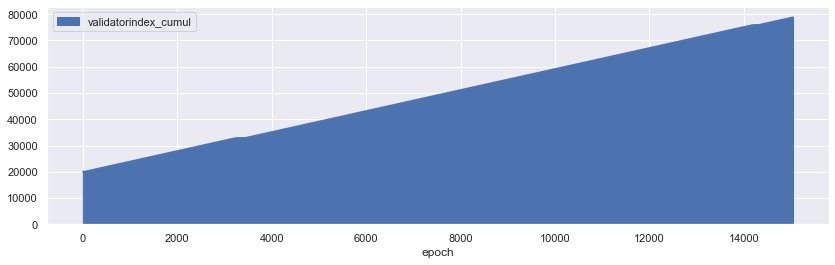

In [71]:
# drop the error 9223372036854775807
validators_entry = validators_entry.loc[validators_entry['epoch'] < 9223372036854775807]
#plot
validators_entry.plot(kind='area',x='epoch', y='validatorindex_cumul', figsize=(14,4))

In [72]:
validators_entry.sum()

exitepoch                   78841
validatorindex              78841
validatorindex_cumul    726663520
epoch                   110754753
dtype: int64

20084 validators enterred in epoch 0 and the remainder trickled in at a steady pace thereafer, with two incidents that stalled growth - (i) the roughtime bug and (ii) a period around epoch 14500 where we have also observed a spike in proposer slashings.

Given that 1/4 of the validators in Medalla were introduced in epoch 0, let's remove that for the sake of the analysis.

# Activation lag

Since a lot of validators enterred in epoch 0, we'll filter for that and proceed with the analysis thereafter

Text(0, 0.5, 'validators')

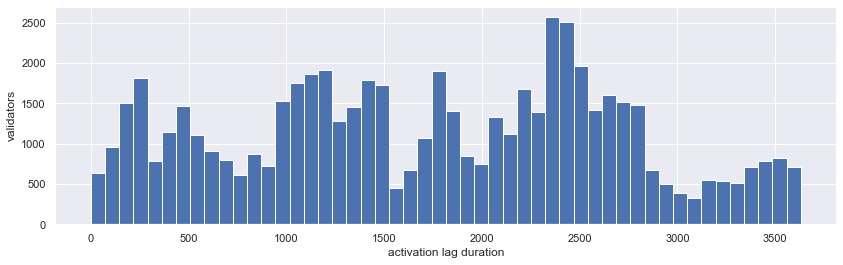

In [73]:
#add activation lag
validators['activation_lag'] = validators['activationepoch']  - validators['activationeligibilityepoch']
#filter out entires at 0 and sort
validators = validators.loc[validators['activationeligibilityepoch'] > 0]
validators.sort_values(by=['activation_lag'], ascending=False)
#histogram
#validators
validators['activation_lag'].hist(bins=50, figsize=(14,4))
pl.xlabel('activation lag duration')
pl.ylabel('validators')

Interesting - footnote to layer the groupings here, particularly for client type!

Now, let's check for the activation_lag trend over time.

Text(0, 0.5, 'average_activation_lag_in_epochs')

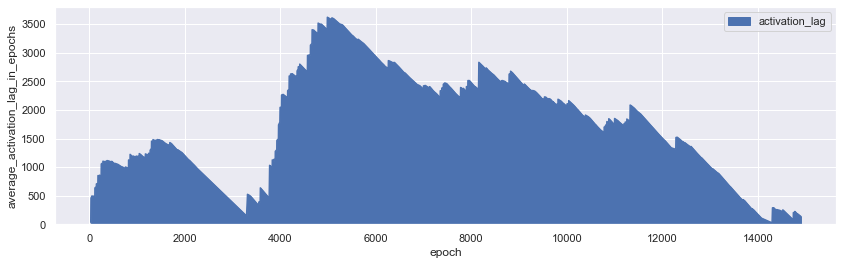

In [74]:
# pivot for avg activation lag
activation_lag_series = pd.pivot_table(validators, index=["activationeligibilityepoch"], values=["activation_lag"], aggfunc='mean')
activation_lag_series.index.name = None
activation_lag_series['epoch'] = activation_lag_series.index
#filter out entires at 0 and sort
activation_lag_series = activation_lag_series.loc[activation_lag_series['activation_lag'] > 0]
# plot time series
activation_lag_series.plot(kind='area',x='epoch', y='activation_lag', figsize=(14,4))
pl.xlabel("epoch")
pl.ylabel("average_activation_lag_in_epochs")

worth considering what the expectation is here - re: activation lag

# Exit lag

Text(0, 0.5, 'validators')

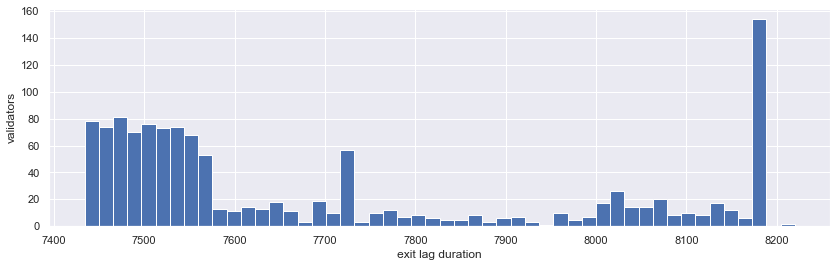

In [168]:
#add exit lag
validators['exit_lag'] = validators['withdrawableepoch']  - validators['exitepoch']
#filter out entires at 0 and sort
validators = validators.loc[validators['exit_lag'] > 10]
validators.sort_values(by=['exit_lag'], ascending=False)
#histogram
#validators
validators['exit_lag'].hist(bins=50, figsize=(14,4))
pl.xlabel('exit lag duration')
pl.ylabel('validators')

In [169]:
validators['exit_lag'].describe()

count    1230.000000
mean     7713.249593
std       268.814367
min      7434.000000
25%      7497.000000
50%      7564.500000
75%      8000.500000
max      8220.000000
Name: exit_lag, dtype: float64

Text(0, 0.5, 'average_exit_lag_in_epochs')

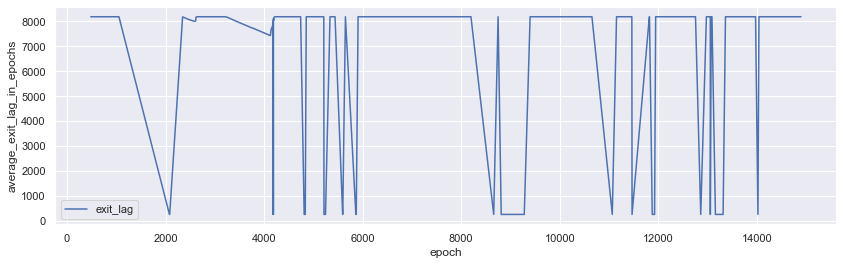

In [76]:
# pivot for avg exit lag
exit_lag_series = pd.pivot_table(validators, index=["exitepoch"], values=["exit_lag"], aggfunc='mean')
exit_lag_series.index.name = None
exit_lag_series['epoch'] = exit_lag_series.index
#filter out entires at 0 and sort
exit_lag_series = exit_lag_series.loc[exit_lag_series['exit_lag'] > 0]
# plot time series
exit_lag_series.plot(kind='line',x='epoch', y='exit_lag', figsize=(14,4))
pl.xlabel("epoch")
pl.ylabel("average_exit_lag_in_epochs")

In [77]:
validators.sort_values(by=['exit_lag'],  inplace=True)
validators

,id,validatorindex,name,activationeligibilityepoch,activationepoch,exitepoch,withdrawableepoch,balance,effectivebalance,lastattestationslot,pubkey,slashed,withdrawalcredentials,activation_lag,exit_lag
20084,20085,20084,NaN,32,38,2077,2333,31.886697,32.0,0,0xa0d46f3e977da3c53d46dcff9a4f7e6b4895cf9fb66e...,NaN,0x00f51a03211451f1cbb0a6b609cfefdb777b837e3344...,6,256
34190,34191,34190,NaN,3312,3757,5869,6125,63.894383,32.0,0,0x90021535413cfab84038895155a4af2673e21df39f03...,NaN,0x00ee8dbcf778a9d6006ae6c8869ef1c430059b3b2343...,445,256
34189,34190,34189,NaN,3312,3757,5869,6125,63.894383,32.0,0,0xb0d981a02f09160659cf9660735417d824a238e112a3...,NaN,0x00ee8dbcf778a9d6006ae6c8869ef1c430059b3b2343...,445,256
34188,34189,34188,NaN,3312,3757,5868,6124,63.894429,32.0,0,0xadd22e8d4f08af1e3331b1a9ef30ae4ca732ee0f0c66...,NaN,0x00880b07f385c5109ece91bdea428d115dbe49c15151...,445,256
34187,34188,34187,NaN,3311,3757,5868,6124,63.894429,32.0,0,0xb7f184d5185569267ae7d129a0345c79e8bba377f711...,NaN,0x00880b07f385c5109ece91bdea428d115dbe49c15151...,446,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38847,38848,38847,NaN,3833,4922,14897,23084,30.962832,30.0,476691,0x8d65d68c25b67af5e78af5532331506bf826800fb71c...,1.0,0x004c8df258d283328adb63b332320c13c4499c1fc672...,1089,8187
38839,38840,38839,NaN,3833,4920,11823,20010,30.873300,30.0,0,0x92d95128cee2e625622f561502fe939a468b5784d256...,1.0,0x006cb0786f4938e9972246e09a119a114d6cf57cbf46...,1087,8187
77039,77040,77039,NaN,14309,14590,14891,23078,31.003135,31.0,476358,0x80ce5765235de33eba47b7a8363764cb94fb87505fa2...,1.0,0x00d881ae7b5456a00534f12151b9803841442e7258cf...,281,8187
26394,26395,26394,ctfn,566,1615,4187,12405,21.278766,21.0,0,0x92cfda4f890f61b11ba629979006f724efcf98522ad9...,1.0,0x008d7215e55edd2fff87109605804c10dec119115234...,1049,8218


# Active validators per epoch

In [78]:
validators_a = pd.read_csv('validators1.csv')
#change balance to actual value
validators_a['balance'] = validators_a['balance']/1000000000
validators_a['effectivebalance'] = validators_a['effectivebalance']/1000000000
# replace 9223372036854775807 tag with 0 - the last epoch in the dataset
validators_a['exitepoch'] = validators_a['exitepoch'].replace({9223372036854775807:0})
validators_a['withdrawableepoch'] = validators_a['withdrawableepoch'].replace({9223372036854775807:14572})
validators_a['activationepoch'] = validators_a['activationepoch'].replace({9223372036854775807:14572})
# fill nan with 0
validators_a.fillna(0)
# inspect
validators_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78847 entries, 0 to 78846
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          78847 non-null  int64  
 1   validatorindex              78847 non-null  int64  
 2   name                        17031 non-null  object 
 3   activationeligibilityepoch  78847 non-null  int64  
 4   activationepoch             78847 non-null  int64  
 5   exitepoch                   78847 non-null  int64  
 6   withdrawableepoch           78847 non-null  int64  
 7   balance                     78847 non-null  float64
 8   effectivebalance            78847 non-null  float64
 9   lastattestationslot         78847 non-null  int64  
 10  pubkey                      78847 non-null  object 
 11  slashed                     5330 non-null   float64
 12  withdrawalcredentials       78847 non-null  object 
dtypes: float64(3), int64(7), object

First shape up the df

In [79]:
#pivot validators_entry
validators_entry = pd.pivot_table(validators_a, index=["activationepoch"], values=["validatorindex"], aggfunc='count')
validators_entry.index.name = None
#cumsum
validators_entry['validatorindex_cumul'] = validators_entry['validatorindex'].cumsum()
#create new column with index
validators_entry['epoch'] = validators_entry.index
validators_entry = validators_entry.drop(columns=['validatorindex'])
validators_entry

,validatorindex_cumul,epoch
0,20084,0
38,20088,38
39,20092,39
40,20096,40
41,20100,41
...,...,...
15037,78834,15037
15038,78838,15038
15039,78842,15039
15040,78846,15040


In [80]:
#pivot validators_exit
validators_exit = pd.pivot_table(validators_a, index=["exitepoch"], values=["validatorindex"], aggfunc='count')
validators_exit.index.name = None
#create new column with index
validators_exit['epoch'] = validators_exit.index
#filter 0
validators_exit = validators_exit.loc[validators_exit['epoch'] > 0]
#cumsum
validators_exit['validatorindex_cumul'] = validators_exit['validatorindex'].cumsum()
#drop_validator_index
validators_exit = validators_exit.drop(columns=['validatorindex'])
validators_exit

,epoch,validatorindex_cumul
9,9,1
26,26,2
44,44,3
482,482,4
535,535,5
...,...,...
14815,14815,6286
14829,14829,6288
14881,14881,6289
14891,14891,6290


In [81]:
#generate dataframe of epochs for 0 to 15041
epok = pd.Series(range(0,15041))
epochs = pd.DataFrame(epok)
#left join validator entry
validators_active_e = pd.merge(left=epochs, right=validators_entry, how='left', left_on=0, right_on='epoch')
#left join exit
validators_active = pd.merge(left=validators_active_e, right=validators_exit, how='left', left_on=0, right_on='epoch')
#drop epochs
validators_active = validators_active.drop(columns=['epoch_x', 'epoch_y'])
#rename columns
validators_active = validators_active.rename(columns={"validatorindex_cumul_x": "validators_entered_cumul", "validatorindex_cumul_y": "validators_exited_cumul"})
#frontfill columns
validators_active = validators_active.ffill()
#fillna on exited
validators_active['validators_exited_cumul'] = validators_active['validators_exited_cumul'].fillna(0)
#generate new column with the active vals
validators_active['validators_active'] = validators_active['validators_entered_cumul'] - validators_active['validators_exited_cumul']
#generate new column with finality requirement and round down
validators_active['validator_req_ffg'] = validators_active['validators_active']*2/3
validators_active['validator_req_ffg'] = validators_active['validator_req_ffg'].round(decimals=0)
#generate per column for per slot
validators_active['validator_req_ffg_per_slot'] = validators_active['validator_req_ffg']/32
#check result
validators_active.tail()

,0,validators_entered_cumul,validators_exited_cumul,validators_active,validator_req_ffg,validator_req_ffg_per_slot
15036,15036,78830.0,6292.0,72538.0,48359.0,1511.21875
15037,15037,78834.0,6292.0,72542.0,48361.0,1511.28125
15038,15038,78838.0,6292.0,72546.0,48364.0,1511.37500
15039,15039,78842.0,6292.0,72550.0,48367.0,1511.46875
15040,15040,78846.0,6292.0,72554.0,48369.0,1511.53125


Text(0.5, 0, 'epoch')

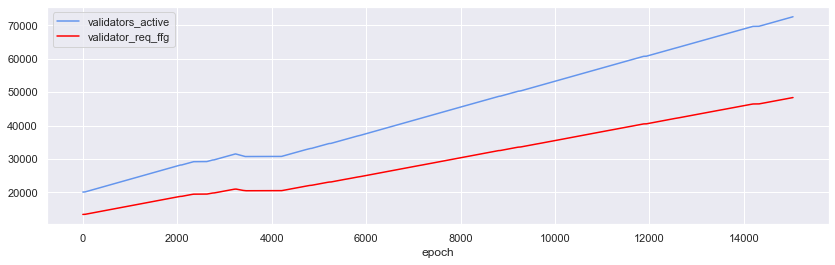

In [82]:
# active validators over time
validators_active.plot(kind='line',x=0, y=['validators_active', 'validator_req_ffg'], figsize=(14,4),  color = ['cornflowerblue', 'red', 'orange'])
pl.xlabel("epoch")

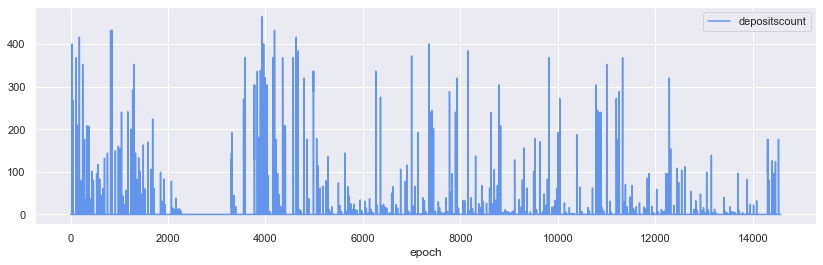

In [83]:
df.head(10)
columna = ['depositscount']
colorscheme = ['cornflowerblue', 'gold','darkgreen', 'tomato']
summary_val_active = pd.pivot_table(df, index=["epoch"], values= columna, aggfunc=sum)
summary_val_active.index.name = None
summary_val_active['epoch'] = summary_val_active.index
summary_val_active = summary_val_active.loc[summary_val_active['epoch'] > 0]
summary_val_active.plot(kind='line',x='epoch', y=columna, color = colorscheme, figsize=(14,4))

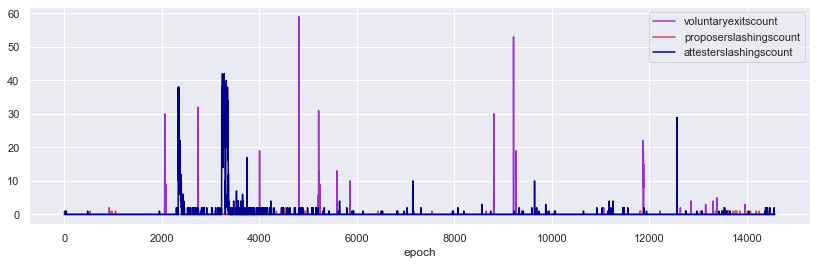

In [84]:
columna = ['voluntaryexitscount','proposerslashingscount', 'attesterslashingscount']
colorscheme = ['darkorchid','r', 'darkblue']
summary_val_active_2 = pd.pivot_table(df, index=["epoch"], values= columna, aggfunc=sum)
summary_val_active_2.index.name = None
summary_val_active_2['epoch'] = summary_val_active_2.index
summary_val_active_2 = summary_val_active_2.loc[summary_val_active_2['epoch'] > 0]
summary_val_active_2.plot(kind='line',x='epoch', y=columna , color = colorscheme, figsize=(14,4))

In [85]:
#validators 
ffg = validators_active['validator_req_ffg_per_slot']
ffg.to_csv('ffg_requirement_per_epoch_and_slot.csv')

In [86]:
validators_active.to_csv('active_validators_over_time.csv')

# Proposer eff per id

In [87]:
val_ids = pd.read_csv('val_ids.csv')
proposer_effectiveness_id = pd.merge(left=proposer_effectiveness, right=val_ids, how='left', left_on='validator_index', right_on='validatorindex')
proposer_effectiveness_id.head()
proposer_effectiveness_id['proposed']=proposer_effectiveness_id['participated']-proposer_effectiveness_id['missed']
proposer_effectiveness_id

,validator_index,activationepoch,slashed,epochs_active,missed,participated,proposer_effectiveness,proposer_effectiveness_time_weighted,epoch,probability_of_proposing_at_least_once_hereon,proposer_effectiveness_time_n_diff_weighted,Unnamed: 0,identifier,validatorindex,client_identifier,proposed
0,76773,14523,0.0,49,0.0,1.0,1.0,0.020408,14523.0,0.001688,12.087853,67192.0,Rocketpool/Wouimbly/Paolo,76773.0,unknown,1.0
1,76668,14497,0.0,75,0.0,1.0,1.0,0.013333,14497.0,0.012602,1.058056,67089.0,Rocketpool/Wouimbly/Paolo,76668.0,unknown,1.0
2,76646,14491,0.0,81,0.0,1.0,1.0,0.012346,14491.0,0.015105,0.817306,67067.0,Rocketpool/Wouimbly/Paolo,76646.0,unknown,1.0
3,76625,14486,0.0,86,0.0,1.0,1.0,0.011628,14486.0,0.017187,0.676536,67047.0,Rocketpool/Wouimbly/Paolo,76625.0,unknown,1.0
4,76603,14481,0.0,91,0.0,1.0,1.0,0.010989,14481.0,0.019266,0.570393,67026.0,Rocketpool/Wouimbly/Paolo,76603.0,unknown,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76779,22865,733,0.0,13839,11.0,11.0,0.0,0.000000,733.0,0.999955,0.000000,NaN,NaN,NaN,NaN,0.0
76780,22864,733,0.0,13839,8.0,8.0,0.0,0.000000,733.0,0.999955,0.000000,NaN,NaN,NaN,NaN,0.0
76781,22863,732,0.0,13840,12.0,12.0,0.0,0.000000,732.0,0.999955,0.000000,NaN,NaN,NaN,NaN,0.0
76782,22862,732,0.0,13840,15.0,15.0,0.0,0.000000,732.0,0.999955,0.000000,NaN,NaN,NaN,NaN,0.0


In [88]:
prop_eff_by_client = pd.pivot_table(proposer_effectiveness_id, index=["client_identifier"], values=['slashed',"missed","proposed"], aggfunc=sum)
prop_eff_by_client.index.name = None
#create new column with index
prop_eff_by_client['client'] = prop_eff_by_client.index
prop_eff_by_client

,missed,proposed,slashed,client
lighthouse,15358.0,36738.0,34.0,lighthouse
lodestar,274.0,191.0,0.0,lodestar
nimbus,7479.0,6477.0,65.0,nimbus
prysm,14161.0,78036.0,253.0,prysm
teku,3398.0,14825.0,5.0,teku
unknown,52911.0,173132.0,3984.0,unknown


In [89]:
prop_eff_by_client1 = pd.pivot_table(proposer_effectiveness_id, index=["client_identifier"], values=['proposer_effectiveness_time_weighted',"proposer_effectiveness_time_n_diff_weighted"], aggfunc='mean')
prop_eff_by_client1.sort_values(by=['proposer_effectiveness_time_n_diff_weighted'], ascending=False)

,proposer_effectiveness_time_n_diff_weighted,proposer_effectiveness_time_weighted
client_identifier,,
lighthouse,0.001069,0.000143
unknown,0.000585,0.000114
prysm,0.000275,0.000173
lodestar,0.000137,0.000111
teku,0.000083,0.000073
nimbus,0.000057,0.000047


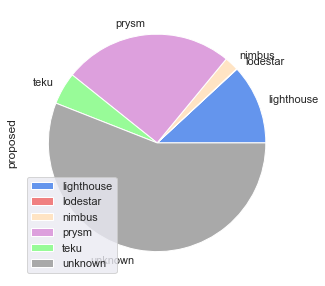

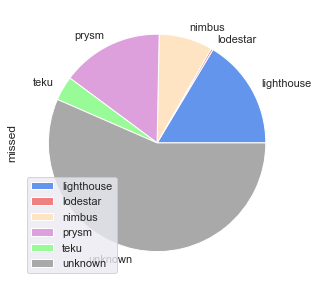

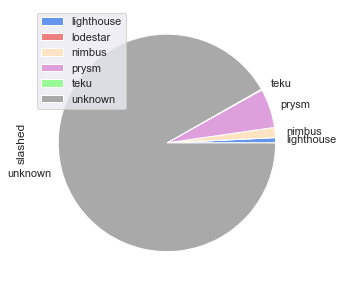

In [90]:
colorscheme = ['cornflowerblue', 'lightcoral','bisque', 'plum', 'palegreen','darkgray']
prop_eff_by_client.sort_values(by=['proposed'], ascending=False)
prop_eff_by_client.plot.pie(y='proposed', colors = colorscheme, figsize=(5, 5))
prop_eff_by_client.plot.pie(y='missed', colors = colorscheme, figsize=(5, 5))
prop_eff_by_client.plot.pie(y='slashed', colors = colorscheme, figsize=(5, 5))

In [91]:
prop_eff_by_group = pd.pivot_table(proposer_effectiveness_id, index=["identifier"], values=['slashed',"missed","proposed"], aggfunc=sum)
prop_eff_by_group.index.name = None
#create new column with index
a = prop_eff_by_group.sort_values(by=['proposed'], ascending=False).iloc[:30]
a

,missed,proposed,slashed
StakeWise,3398.0,21594.0,267.0
theruraljuror,1144.0,20707.0,0.0
EF - 1st in Testnet,2620.0,20486.0,0.0
eth1 - 0xa9ae9208961dae2363260648612c5349fe67167b,156.0,17835.0,42.0
C - 0x00d0c,7555.0,15464.0,35.0
N - 0x0088ee,1019.0,10752.0,0.0
PegaSys Teku,1356.0,10732.0,0.0
prylabs,938.0,9906.0,1021.0
B - 0x00241,1462.0,7542.0,404.0
Œæ nlp Œæ,1465.0,7364.0,1949.0


Text(0.5, 0, 'block slots')

/Users/eliasimos/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 63743 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eliasimos/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 63743 missing from current font.
  font.set_text(s, 0, flags=flags)


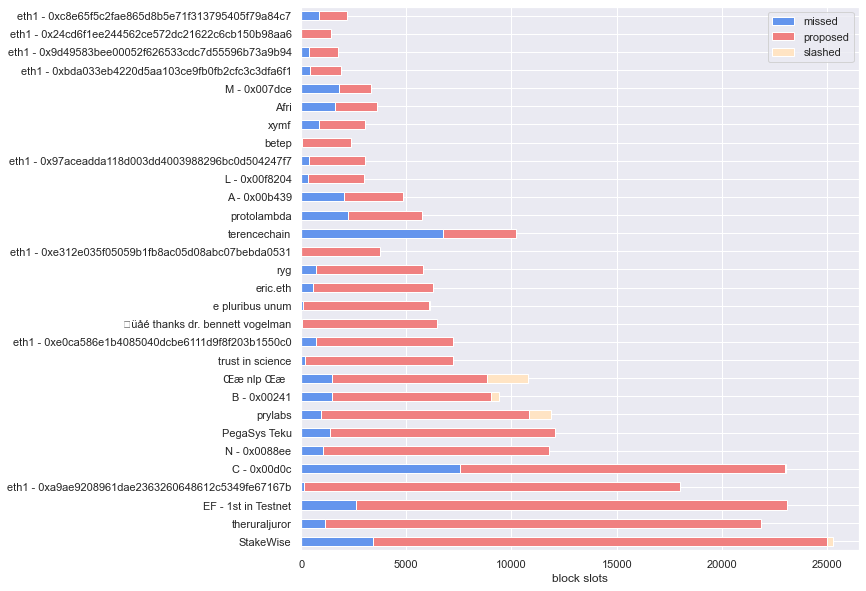

In [92]:
prop_eff_by_group.sort_values(by=['proposed'], ascending=False)
#prop_eff_by_group.to_csv('prop_eff_by_group.csv')
colorscheme = ['cornflowerblue', 'lightcoral','bisque', 'plum', 'palegreen','darkgray']
a.sort_values(by=['proposed'], ascending=False).plot(kind='barh', stacked=True, color = colorscheme, figsize=(10,10))
pl.xlabel("block slots")

In [93]:
prop_eff_by_group1 = pd.pivot_table(proposer_effectiveness_id, index=["identifier"], values=['proposer_effectiveness_time_weighted', 'proposer_effectiveness_time_n_diff_weighted'], aggfunc='mean')
prop_eff_by_group1.index.name = None

In [94]:
prop_eff_by_group1.sort_values(by=['proposer_effectiveness_time_n_diff_weighted'], ascending=False).head(30)
prop_eff_by_group1.to_csv('prop_eff_by_group1.csv')

In [95]:
prop_eff_by_group1.sort_values(by=['proposer_effectiveness_time_n_diff_weighted'], ascending=False).head(30)

,proposer_effectiveness_time_n_diff_weighted,proposer_effectiveness_time_weighted
Rocketpool/Wouimbly/Paolo,0.034481,0.000483
eth1 - 0x388ea662ef2c223ec0b047d41bf3c0f362142ad5,0.003909,0.000829
<n√ºsse>,0.003853,0.000823
eth1 - 0xa514fe451d039788f3d45e91b5314cdd3ee25023,0.001982,0.000363
your_graffiti_here,0.001885,0.000553
** | etherchest.com | **,0.000813,0.000483
stakewise,0.000782,0.000224
eth1 - 0x97aceadda118d003dd4003988296bc0d504247f7,0.000748,0.000257
validating_from_dappnode,0.000718,0.000296
eth1 - 0xadf6e7a15e590a635200c2b2fd1cc767c4791c5f,0.000502,0.000268


In [96]:
no_proposer_effectiveness_id = pd.merge(left=no_prop_outlier, right=val_ids, how='left', left_on='validator_index', right_on='validatorindex')
no_proposer_effectiveness_id

,validator_index,activationepoch,slashed,epochs_active,missed,participated,proposer_effectiveness,proposer_effectiveness_time_weighted,epoch,probability_of_proposing_at_least_once_hereon,proposer_effectiveness_time_n_diff_weighted,Unnamed: 0,identifier,validatorindex,client_identifier
0,2550,0,1.0,14572,0.0,0.0,0.0,0.0,0.0,0.999985,0.0,24750.0,B - 0x00241,2550.0,unknown
1,2500,0,1.0,14572,0.0,0.0,0.0,0.0,0.0,0.999985,0.0,24702.0,B - 0x00241,2500.0,unknown
2,10192,0,1.0,14572,0.0,0.0,0.0,0.0,0.0,0.999985,0.0,28878.0,eth1 - 0xa9ae9208961dae2363260648612c5349fe67167b,10192.0,unknown
3,2199,0,1.0,14572,0.0,0.0,0.0,0.0,0.0,0.999985,0.0,24401.0,B - 0x00241,2199.0,unknown
4,2164,0,1.0,14572,0.0,0.0,0.0,0.0,0.0,0.999985,0.0,24366.0,B - 0x00241,2164.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,23358,856,1.0,13716,0.0,0.0,0.0,0.0,856.0,0.999947,0.0,NaN,NaN,NaN,NaN
199,23356,856,1.0,13716,0.0,0.0,0.0,0.0,856.0,0.999947,0.0,NaN,NaN,NaN,NaN
200,23326,848,1.0,13724,0.0,0.0,0.0,0.0,848.0,0.999948,0.0,NaN,NaN,NaN,NaN
201,23325,848,1.0,13724,0.0,0.0,0.0,0.0,848.0,0.999948,0.0,NaN,NaN,NaN,NaN


In [97]:
no_proposer_effectiveness_id_by_client = pd.pivot_table(no_proposer_effectiveness_id, index=["identifier"], values=['probability_of_proposing_at_least_once_hereon'], aggfunc='count')
no_proposer_effectiveness_id_by_client

,probability_of_proposing_at_least_once_hereon
identifier,
Œæ nlp Œæ,1
Alex.eth,2
B - 0x00241,18
StakeWise,5
ctfn,4
e pluribus unum,2
eth1 - 0x35c25ad09166fc2c3a1b26f6636afe671230be30,9
eth1 - 0x9b49e8a93b241a96a29bee871a373146b22fa59f,2
eth1 - 0xa9ae9208961dae2363260648612c5349fe67167b,19


In [98]:
no_proposer_effectiveness_id_by_client_e = pd.pivot_table(no_proposer_effectiveness_id, index=["identifier"], values=['epochs_active'], aggfunc='mean')
no_proposer_effectiveness_id_by_client_e

,epochs_active
identifier,
Œæ nlp Œæ,14572.0
Alex.eth,12685.5
B - 0x00241,14572.0
StakeWise,13829.2
ctfn,13236.0
e pluribus unum,14572.0
eth1 - 0x35c25ad09166fc2c3a1b26f6636afe671230be30,11821.0
eth1 - 0x9b49e8a93b241a96a29bee871a373146b22fa59f,14572.0
eth1 - 0xa9ae9208961dae2363260648612c5349fe67167b,14572.0


In [99]:
no_proposer_effectivenesssss_id = pd.merge(left=no_proposer_effectiveness_id_by_client, right=no_proposer_effectiveness_id_by_client_e, how='left', left_on='identifier', right_on='identifier')
no_proposer_effectivenesssss_id.sort_values(by=['probability_of_proposing_at_least_once_hereon'], ascending=False).head(30)
#rename columns
no_proposer_effectivenesssss_id = no_proposer_effectivenesssss_id.rename(columns={'probability_of_proposing_at_least_once_hereon':'validator_indices'})
no_proposer_effectivenesssss_id.sort_values(by=['validator_indices'], ascending=False).head(30)

,validator_indices,epochs_active
identifier,,
prylabs,33,14572.0
eth1 - 0xa9ae9208961dae2363260648612c5349fe67167b,19,14572.0
B - 0x00241,18,14572.0
eth1 - 0x35c25ad09166fc2c3a1b26f6636afe671230be30,9,11821.0
StakeWise,5,13829.2
ctfn,4,13236.0
Alex.eth,2,12685.5
e pluribus unum,2,14572.0
eth1 - 0x9b49e8a93b241a96a29bee871a373146b22fa59f,2,14572.0


In [100]:
colorscheme = ['cornflowerblue', 'lightcoral','bisque', 'plum', 'palegreen']

In [127]:
group_min_activation = pd.pivot_table(proposer_effectiveness_id, index=["identifier"], values=['activationepoch'], aggfunc='min')
group_min_activation.index.name = None
#create new column with index
group_min_activation['identifier'] = group_min_activation.index

In [141]:
group_min_activation_top = group_min_activation.loc[(group_min_activation('identifier') == 'theruraljuror') | (group_min_activation('identifier') == 'theruraljuror')]

TypeError: 'DataFrame' object is not callable